In [49]:
include("astrobee_se3_script.jl")
using Plots

In [50]:
function getModelWithNoObs()
    N = 50
    MAX_ITERATIONS_NB = 100

    model = AstrobeeSE3()

    # Set up environment
    model.x_max[1:3] = [1.0; 1.0; 1.0]
    model.x_min[1:3] = [0.0; 0.0; 0.0]

    obstacles = []
    # obs = [[0.0,0.0,0.0], 6.0]
    # push!(obstacles, obs)
    model.obstacles = obstacles

    poly_obstacles = []
#     obs = PolygonalObstacle([2.5,2.5,0], [5.0, 5.0, 2.0])
#     push!(poly_obstacles, obs)
#     obs = PolygonalObstacle([7.0,3.0,0], [1.0, 1.0, 2.0])
#     push!(poly_obstacles, obs)
    model.poly_obstacles = poly_obstacles

    model.tf_guess = 110.
    model.convergence_threshold = 0.7
    
    return model
end

getModelWithNoObs (generic function with 1 method)

In [95]:
function plot_obs(model; idx = [1,2])

    
#     idx = [1,2]
#     local fig
#     fig = plot(framestyle = :box)


    for obs_i = 1:length(model.obstacles)
        p_obs, obs_radius = model.obstacles[obs_i][1], model.obstacles[obs_i][2]
        plot_circle(p_obs[idx], obs_radius,lab =""; color=:red, fig=fig)
    end
    
    for obs_i = 1:length(model.poly_obstacles)
        center =  model.poly_obstacles[obs_i].c
        (c1,c2) = center[idx]
        if idx[1] == 1
            r1 = model.poly_obstacles[obs_i].dx
        elseif idx[1] == 2
            r1 = model.poly_obstacles[obs_i].dy
        else
            r1 = model.poly_obstacles[obs_i].dz
        end
        if idx[2] == 1
            r2 = model.poly_obstacles[obs_i].dx
        elseif idx[2] == 2
            r2 = model.poly_obstacles[obs_i].dy
        else
            r2 = model.poly_obstacles[obs_i].dz
        end
        lab = ""
        color = :red
        plot!(Shape([(c1-r1,c2-r2), (c1-r1,c2+r2), (c1+r1,c2+r2), (c1+r1, c2-r2)]), seriestype = [:shape,], lw = 0.5,
                c = color, linecolor = :black, linewidth = 10,
                legend = true, fillalpha = 0.0, aspect_ratio = 1, label = lab)
    end
    xlims!((model.x_min[idx[1]],model.x_max[idx[1]]))
    ylims!((model.x_min[idx[2]],model.x_max[idx[2]]))
    plot!(leg = true)
#     return fig
end

plot_obs (generic function with 2 methods)

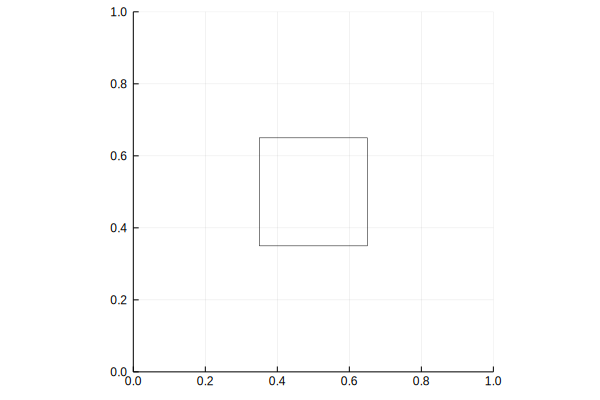

In [97]:
model = getModelWithNoObs()
obs = PolygonalObstacle([0.5,0.5,0.5], 0.3 * ones(3))
push!(model.poly_obstacles, obs)
plot()
plot_obs(model)

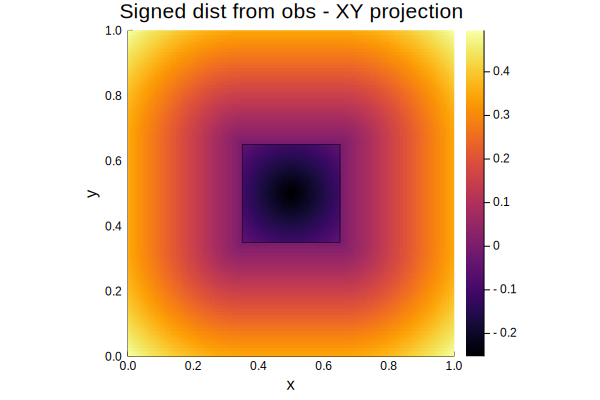

In [106]:
using PyPlot
xs = range(0, length=100, stop=1.0)
ys = range(0, length=100, stop=1.0)
foo(x,y) = signed_distance([x,y,0.5], obs)
z = [foo(x,y) for y in ys, x in xs]
p1 = heatmap(xs, ys, z, aspect_ratio=1)
plot_obs(model,[1,2])
xlabel!("x")
ylabel!("y")
title!("Signed dist from obs - XY projection")

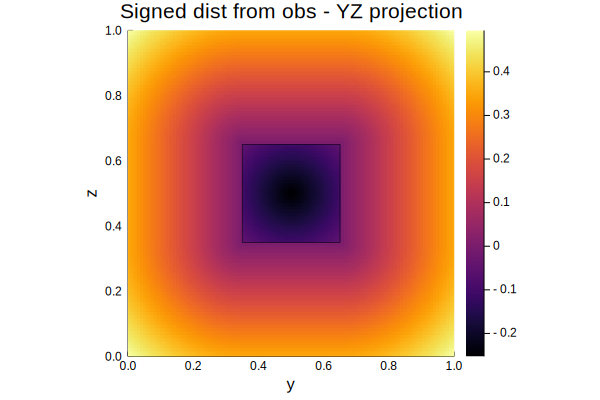

In [107]:
using PyPlot
xs = range(0, length=100, stop=1.0)
ys = range(0, length=100, stop=1.0)
foo(x,y) = signed_distance([0.5,x,y], obs)
z = [foo(x,y) for y in ys, x in xs]
heatmap(xs, ys, z, aspect_ratio=1)
plot_obs(model,[2,3])
xlabel!("y")
ylabel!("z")
title!("Signed dist from obs - YZ projection")

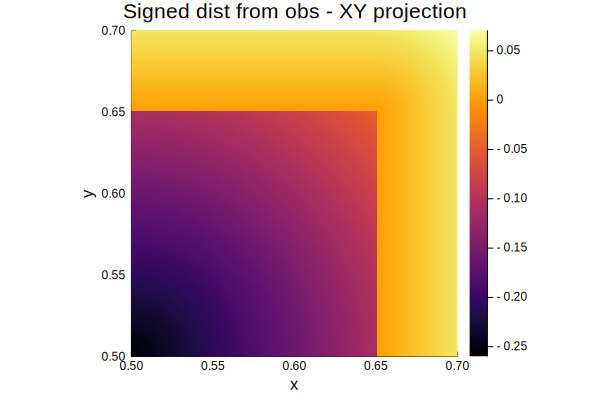

In [125]:
using PyPlot
xs = range(0.5, length=100, stop=.7)
ys = range(0.5, length=100, stop=.7)
foo(x,y) = signed_distance([x,y,0.5], obs)
z = [foo(x,y) for y in ys, x in xs]
p1 = heatmap(xs, ys, z, aspect_ratio=1)
# plot_obs(model,[1,2])
xlabel!("x")
ylabel!("y")
xlims!((0.5,0.7))
ylims!((0.5,0.7))
title!("Signed dist from obs - XY projection")

# Preparation for making heatmaps

In [135]:
p_k = [0.65, 0.65, 0.65]
dist = signed_distance(p_k, obs)
@show dist
p_k = [0.66, 0.65, 0.65]
dist = signed_distance(p_k, obs)
@show dist
p_k = [0.64, 0.65, 0.65]
dist = signed_distance(p_k, obs)
@show dist

dist = 0.0
dist = 0.010000000000000009
dist = 0.14


0.14

z = [1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0; 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0; 3.0 6.0 9.0 12.0 15.0 18.0 21.0 24.0 27.0 30.0; 4.0 8.0 12.0 16.0 20.0 24.0 28.0 32.0 36.0 40.0]


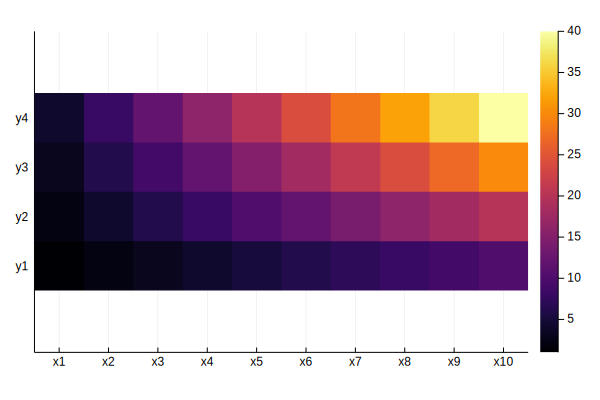

In [110]:
using PyPlot
xs = [string("x", i) for i = 1:10]
ys = [string("y", i) for i = 1:4]
z = float((1:4) * reshape(1:10, 1, :))
@show z
heatmap(xs, ys, z, aspect_ratio=1)
